In [1]:
pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 21.0 MB/s eta 0:00:00


In [2]:
'''
Plotting libraries
'''
import pandas as pd
import matplotlib.cm as cm
#from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
'''
What we'll need for analysis, clustering, etc.
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets, decomposition
from sklearn.manifold import TSNE

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
'''
Of course the powerful RDKIT for cheminformatics <3
'''
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors, Descriptors3D, Draw, rdMolDescriptors, Draw, PandasTools,rdmolops,rdchem
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat
from rdkit.Chem.Draw import IPythonConsole


'''
Some utilities
'''
import progressbar
from math import pi

%config Completer.use_jedi = False
PandasTools.RenderImagesInAllDataFrames(images=True)

# Improt data

In [3]:
#In Step 1, the descriptors whose values are equal to zero for more
#than 95% of the 471 MOFs are removed
df = pd.read_excel('/content/drive/MyDrive/MOF/5023.xlsx',header=1)

#df=df.set_index(df.MOF, inplace=True) 

df_1=df.iloc[:,:-20]

df_1.head(5)

,MOF,Desnity,PLD,LCD,VSA,GSA,Vf,vp,Unit Cell a,Unit Cell b,...,F02[Hs-Og],F02[Mt-Og],F02[Ds-Og],F02[Rg-Og],F02[Cn-Og],F02[Nh-Og],F02[Fl-Og],F02[Mc-Og],F02[Lv-Og],F02[Ts-Og]
0,ABUWOJ,1.15833,4.03039,5.07969,1745.23,1506.680,0.6210,0.536118,14.4988,17.1659,...,0,0,0,0,0,0,0,0,0,0
1,ACOLIP,1.04949,3.57647,4.91034,1065.44,1015.200,0.5434,0.517777,11.5670,11.8393,...,0,0,0,0,0,0,0,0,0,0
2,AFITIT,1.01683,5.37116,7.35330,1381.95,1359.070,0.5610,0.551714,14.0334,17.7321,...,0,0,0,0,0,0,0,0,0,0
3,AGARUW,1.77195,6.25183,6.77693,1346.33,759.804,0.5056,0.285336,8.5210,15.3800,...,0,0,0,0,0,0,0,0,0,0
4,AHOKIR01,1.92701,3.46839,4.30721,892.53,463.167,0.4868,0.252619,4.3999,6.6708,...,0,0,0,0,0,0,0,0,0,0


# Step 1

In [5]:
#step 1
df_2=df_1.drop(columns=df.columns[df.eq(0).mean()>0.95])
df_2.head(5)
df_2.to_csv('step_one.csv', index=False)

<Axes: ylabel='Count'>

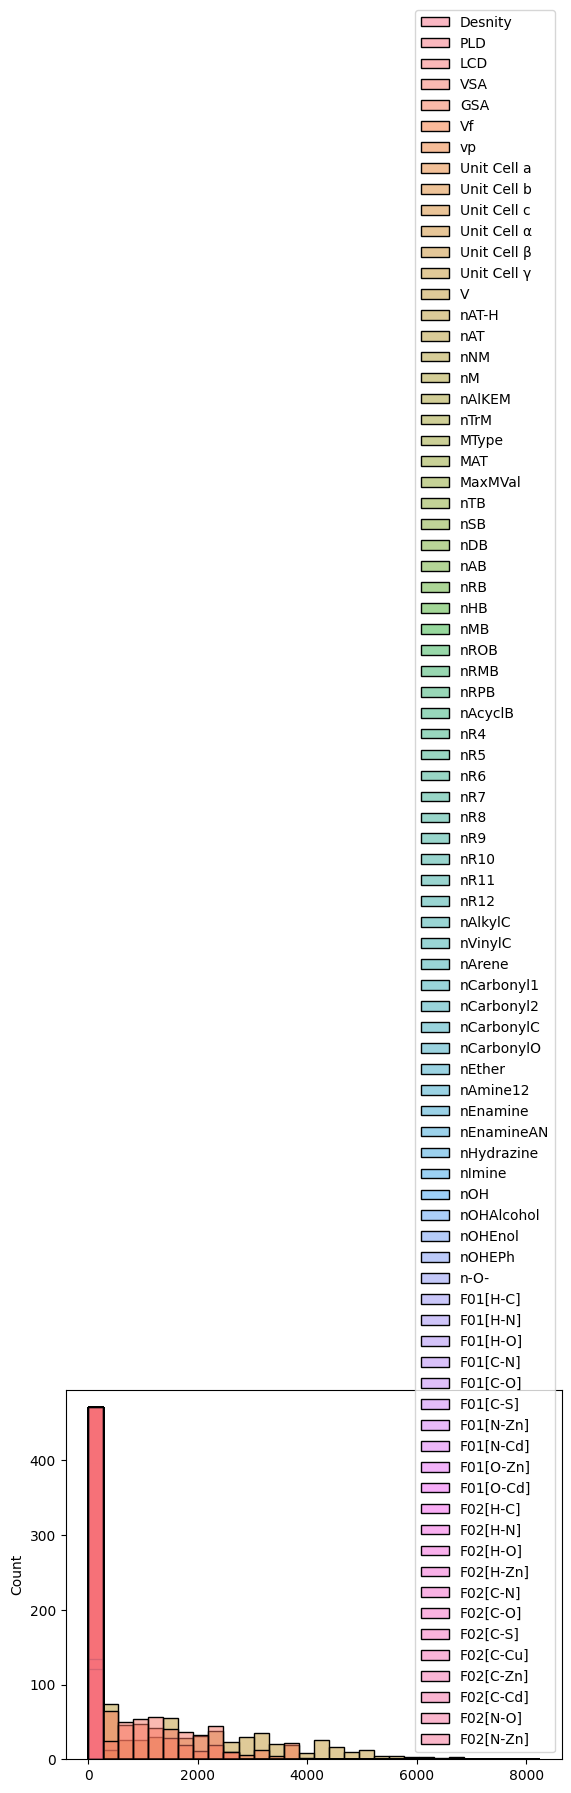

In [ ]:
#https://practicaldatascience.co.uk/data-science/how-to-visualise-statistical-distributions-with-seaborn
sns.histplot(data=df_2, kde = False, color ='red', bins = 30)

# Step 2

In [6]:
#step_2


# create a MinMaxScaler object

scaler = MinMaxScaler()

df_1a=df_1.iloc[:,1:]

df_normalized = pd.DataFrame(scaler.fit_transform(df_1a), columns=df_1a.columns)


variances = df_normalized.var()

# select columns with variances less than 0.02
cols_to_drop = variances[variances < 0.02].index.tolist()

# drop selected columns
df_2=df_normalized.drop(cols_to_drop, axis=1)

df_2.head()
df_2.to_csv('step2.csv', index=False)

,Desnity,PLD,LCD,VSA,GSA,Vf,vp,Unit Cell a,Unit Cell b,Unit Cell c,...,F01[C-O],F01[N-Zn],F01[O-Zn],F02[H-C],F02[C-N],F02[C-O],F02[C-S],F02[C-Zn],F02[C-Cd],F02[N-O]
0,0.237354,0.135804,0.186179,0.633514,0.304726,0.675955,0.278206,0.590189,0.592301,0.494227,...,0.457143,0.000000,0.444444,0.380952,0.000000,0.321429,0.0,0.277778,0.0,0.000000
1,0.200136,0.097992,0.172425,0.386752,0.205324,0.551223,0.267262,0.430667,0.291689,0.312751,...,0.200000,0.118056,0.072917,0.500000,0.291667,0.140625,0.0,0.218750,0.0,0.125000
2,0.188968,0.247494,0.370840,0.501644,0.274872,0.579512,0.287512,0.564866,0.624255,0.474747,...,0.220690,0.065134,0.160920,0.551724,0.080460,0.155172,0.0,0.241379,0.0,0.137931
3,0.447182,0.320857,0.324028,0.488714,0.153671,0.490464,0.128563,0.264932,0.491512,0.509174,...,0.628571,0.000000,0.000000,0.142857,0.500000,0.321429,0.0,0.000000,0.0,0.571429
4,0.500205,0.088988,0.123439,0.323986,0.093676,0.460246,0.109041,0.040699,0.000000,0.143213,...,0.000000,0.000000,0.000000,0.571429,0.000000,0.482143,0.0,0.000000,0.0,0.000000


# Step 3

In [8]:
#https://stackoverflow.com/questions/46919816/how-to-get-original-data-from-normalized-array
# Trasform new data in the [0-1] range
scaled_new_data = scaler.fit_transform(df_2)

# Inverse transform new data from [0-1] to [min, max] of data
df_3 = scaler.inverse_transform(scaled_new_data)
df_3 =pd.DataFrame(df_3,columns=df_2.columns)
df_3.head(5)

,Desnity,PLD,LCD,VSA,GSA,Vf,vp,Unit Cell a,Unit Cell b,Unit Cell c,...,F01[C-O],F01[N-Zn],F01[O-Zn],F02[H-C],F02[C-N],F02[C-O],F02[C-S],F02[C-Zn],F02[C-Cd],F02[N-O]
0,0.237354,0.135804,0.186179,0.633514,0.304726,0.675955,0.278206,0.590189,0.592301,0.494227,...,0.457143,0.000000,0.444444,0.380952,0.000000,0.321429,0.0,0.277778,0.0,0.000000
1,0.200136,0.097992,0.172425,0.386752,0.205324,0.551223,0.267262,0.430667,0.291689,0.312751,...,0.200000,0.118056,0.072917,0.500000,0.291667,0.140625,0.0,0.218750,0.0,0.125000
2,0.188968,0.247494,0.370840,0.501644,0.274872,0.579512,0.287512,0.564866,0.624255,0.474747,...,0.220690,0.065134,0.160920,0.551724,0.080460,0.155172,0.0,0.241379,0.0,0.137931
3,0.447182,0.320857,0.324028,0.488714,0.153671,0.490464,0.128563,0.264932,0.491512,0.509174,...,0.628571,0.000000,0.000000,0.142857,0.500000,0.321429,0.0,0.000000,0.0,0.571429
4,0.500205,0.088988,0.123439,0.323986,0.093676,0.460246,0.109041,0.040699,0.000000,0.143213,...,0.000000,0.000000,0.000000,0.571429,0.000000,0.482143,0.0,0.000000,0.0,0.000000


In [9]:
# step3

# calculate the correlation matrix
corr_matrix = df_3.corr()

# create a mask to identify highly correlated features  (index)
mask = (corr_matrix.abs() > 0.9) & (corr_matrix.abs() < 1.0)

# identify the features with the largest total correlation coefficient
total_corr = corr_matrix.sum().sort_values(ascending=False)
drop_cols = []
for col in total_corr.index:
    if col not in drop_cols:
        correlated_cols = corr_matrix.loc[col, mask.loc[col]].index
        corr_sum = corr_matrix.loc[correlated_cols, correlated_cols].sum().sum()
        drop_cols += [c for c in correlated_cols if corr_matrix.loc[c, total_corr.index[total_corr.index != c]].sum() < corr_sum]

# drop the highly correlated features
df_3.drop(drop_cols, axis=1, inplace=True)


df_3.head(5)

df_3.to_csv('step_3.csv', index=False)

# Step 4

In [10]:
#step4 1. PA 0.1 Pa

#data preparation
target=df.iloc[:,-20:]  #prepare target data
#df4=df_3.set_index(df.columns[0]) 

target.head(5)

pa_tar=target.iloc[:,-7:-6]
pa_tar

,q (mol⸱kg-1)
0,2.725819
1,1.626423
2,2.924481
3,1.498487
4,0.000012
...,...
466,5.478644
467,0.000000
468,0.689662
469,5.987217


In [46]:
# step4  train

#https://vitalflux.com/feature-importance-random-forest-classifier-python/

# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(df_3, pa_tar, test_size = 0.25, random_state=1)
#
# Feature scaling
#
sc = MinMaxScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std = pd.DataFrame(X_train_std, columns=df_3.columns)
X_test_std = pd.DataFrame(X_test_std, columns=df_3.columns)

forest = RandomForestRegressor(n_estimators=500)
forest.fit(X_train_std, y_train.values.ravel())

RandomForestRegressor(n_estimators=500)

In [17]:
X_train_std

,Desnity,PLD,LCD,VSA,Vf,Unit Cell a,Unit Cell b,Unit Cell c,Unit Cell α,Unit Cell β,...,F01[C-O],F01[N-Zn],F01[O-Zn],F02[H-C],F02[C-N],F02[C-O],F02[C-S],F02[C-Zn],F02[C-Cd],F02[N-O]
0,1.702976,-1.007886,-1.137294,-1.285050,-1.130114,-1.267868,0.831990,0.134399,-0.061873,0.918505,...,2.125632,-0.509784,-0.670268,-0.970007,-0.901108,3.469998,-0.241402,-0.880246,2.335890,-0.739848
1,-0.416738,0.022786,-0.010204,0.300768,-0.072402,0.532732,-0.335630,-0.785890,1.235594,1.658564,...,-0.216035,-0.030900,0.323867,0.835418,-0.189213,-0.276748,-0.241402,0.389348,-0.394598,0.345992
2,1.560701,-0.364125,-0.620790,0.013628,-0.785582,-1.120581,-1.881284,-1.504495,1.320464,1.648247,...,0.486465,-0.509784,-0.670268,-1.472386,-0.901108,0.407441,-0.241402,-0.880246,-0.394598,-0.739848
3,1.327078,-0.532398,-0.556153,-0.323046,-0.661551,-0.379282,-0.828512,-0.568321,0.056542,0.064852,...,2.627418,-0.509784,4.442430,-1.911968,-0.901108,-1.417062,-0.241402,3.472650,-0.394598,-0.739848
4,1.049617,-0.627970,-0.400657,-0.800112,-0.565082,-0.655292,-0.343637,-1.037186,-0.061873,0.064852,...,0.174243,-0.509784,-0.670268,-1.911968,1.630075,0.103357,-0.241402,-0.880246,-0.394598,5.775194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-1.793644,1.413325,1.436110,1.555716,2.079197,0.444829,-0.423818,1.868998,-0.061873,0.064852,...,0.054158,-0.509784,0.553283,0.793151,-0.901108,-0.013598,-0.241402,0.161472,-0.394598,-0.739848
349,0.556478,-1.155433,-0.487491,-1.285050,-0.702895,-0.779952,-0.730653,-0.306293,0.373495,1.498152,...,-1.386868,-0.509784,-0.670268,0.381502,0.089355,0.367777,1.266303,-0.880246,0.935031,1.526253
350,-1.694853,1.667679,3.108394,1.439331,2.244572,2.031235,1.167724,0.375875,-2.438909,-2.854923,...,0.669229,-0.509784,1.657464,0.017903,-0.901108,0.585441,-0.241402,0.606108,-0.394598,-0.739848
351,-1.292379,0.977523,1.635842,1.559300,1.669205,1.071450,0.204832,-0.524399,-0.993366,-1.079325,...,0.620275,-0.509784,-0.670268,-0.499026,0.319284,0.537762,-0.241402,-0.880246,-0.394598,-0.739848


In [31]:
# get the feature importances
importances = forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
# print the feature importances
for i, importance in enumerate(importances):
    print(f'{feature_names[i]}: {importance:.3f}')

Desnity: 0.169
PLD: 0.014
LCD: 0.083
VSA: 0.275
Vf: 0.177
Unit Cell a: 0.007
Unit Cell b: 0.008
Unit Cell c: 0.006
Unit Cell α : 0.005
Unit Cell β : 0.003
Unit Cell γ : 0.007
V: 0.005
nAT-H: 0.015
nM: 0.021
nTrM: 0.096
MAT: 0.002
MaxMVal: 0.001
nDB: 0.005
nRB: 0.007
nHB: 0.001
nMB: 0.007
nR4: 0.003
nR5: 0.003
nR6: 0.007
nAlkylC: 0.011
nVinylC: 0.003
nArene: 0.003
nAmine12: 0.001
nEnamineAN: 0.002
nOHEPh: 0.003
n-O-: 0.003
F01[H-C]: 0.008
F01[C-N]: 0.005
F01[C-O]: 0.005
F01[N-Zn]: 0.003
F01[O-Zn]: 0.004
F02[H-C]: 0.004
F02[C-N]: 0.002
F02[C-O]: 0.004
F02[C-S]: 0.000
F02[C-Zn]: 0.003
F02[C-Cd]: 0.000
F02[N-O]: 0.005


In [47]:
# create dataframe with feature names and importances
df_feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# write dataframe to csv file
df_feature_importances.to_csv('feature_importances.csv', index=False)

In [48]:
# sort dataframe by importance in descending order
df_feature_importances = df_feature_importances.sort_values(by='importance', ascending=False)

# write dataframe to csv file
df_feature_importances.to_csv('feature_importances.csv', index=False)

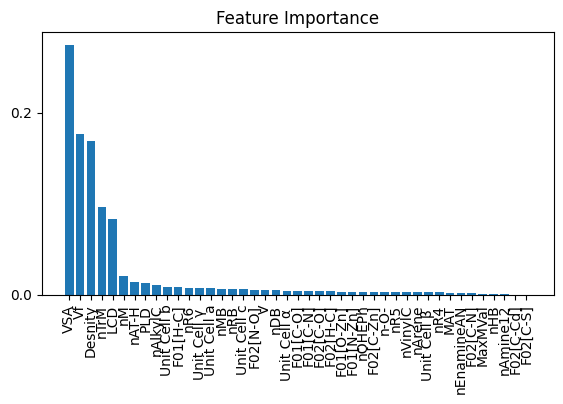

<Figure size 1850x1050 with 0 Axes>

In [13]:

 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.rcParams["figure.figsize"] = (25,8)
plt.rcParams.update({'font.size': 32})
plt.tight_layout()
plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

Ad_pa = pd.DataFrame({'x':X_train.columns[sorted_indices], "y": importances[sorted_indices]})

Ad_pa

Ad_pa.to_csv('ad_pa.csv',index=False)

In [16]:
X_train.columns

Index(['Desnity', 'PLD', 'LCD', 'VSA', 'Vf', 'Unit Cell a', 'Unit Cell b',
       'Unit Cell c', 'Unit Cell α ', 'Unit Cell β ', 'Unit Cell γ ', 'V',
       'nAT-H', 'nM', 'nTrM', 'MAT', 'MaxMVal', 'nDB', 'nRB', 'nHB', 'nMB',
       'nR4', 'nR5', 'nR6', 'nAlkylC', 'nVinylC', 'nArene', 'nAmine12',
       'nEnamineAN', 'nOHEPh', 'n-O-', 'F01[H-C]', 'F01[C-N]', 'F01[C-O]',
       'F01[N-Zn]', 'F01[O-Zn]', 'F02[H-C]', 'F02[C-N]', 'F02[C-O]',
       'F02[C-S]', 'F02[C-Zn]', 'F02[C-Cd]', 'F02[N-O]'],
      dtype='object')

In [14]:
df_name=df[['MOF']]
df_name

,MOF
0,ABUWOJ
1,ACOLIP
2,AFITIT
3,AGARUW
4,AHOKIR01
...,...
466,ZESFUY
467,ZIBGIC
468,ZIDDIB
469,ZIKJIO


# **PE**

In [35]:
#step4 1. PA 0.1 Pa

#data preparation
target=df.iloc[:,-20:]  #prepare target data
#df4=df_3.set_index(df.columns[0]) 

target.head(5)



,Unnamed: 5024,Molecule,Pressure (bar),q (mol⸱kg-1),Pressure (bar).1,q (mol⸱kg-1).1,Pressure (bar).2,q (mol⸱kg-1).2,Pressure (bar).3,q (mol⸱kg-1).3,Unnamed: 5034,Molecule.1,Pressure (bar).4,q (mol⸱kg-1),Pressure (bar).5,q (mol⸱kg-1) .1,Pressure (bar).6,q (mol⸱kg-1).4,Pressure (bar).7,q (mol⸱kg-1).5
0,NaN,Propene,0.156041,2.975163,1.56041,3.564343,15.6041,3.879516,156.041,3.946975,NaN,Propane,0.102321,2.725819,1.02321,3.230644,10.2321,3.611980,102.321,3.688063
1,NaN,Propene,0.156041,1.790304,1.56041,2.465527,15.6041,4.256359,156.041,4.732960,NaN,Propane,0.102321,1.626423,1.02321,2.054022,10.2321,2.402406,102.321,2.487102
2,NaN,Propene,0.156041,2.970786,1.56041,3.684457,15.6041,4.092367,156.041,4.146126,NaN,Propane,0.102321,2.924481,1.02321,3.446984,10.2321,3.862534,102.321,3.886005
3,NaN,Propene,0.156041,1.489984,1.56041,1.551417,15.6041,1.608385,156.041,1.647867,NaN,Propane,0.102321,1.498487,1.02321,1.543483,10.2321,1.549297,102.321,1.557069
4,NaN,Propene,0.156041,0.000305,1.56041,0.002731,15.6041,0.018634,156.041,0.029714,NaN,Propane,0.102321,0.000012,1.02321,0.000124,10.2321,0.001125,102.321,0.001536


In [39]:
PE_tar=target.iloc[:,3:4]
PE_tar

,q (mol⸱kg-1)
0,2.975163
1,1.790304
2,2.970786
3,1.489984
4,0.000305
...,...
466,6.000111
467,0.000000
468,0.689742
469,6.134680


In [43]:
# step4  train

#https://vitalflux.com/feature-importance-random-forest-classifier-python/

# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(df_3, PE_tar, test_size = 0.25, random_state=1)
#
# Feature scaling
#
sc = MinMaxScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std = pd.DataFrame(X_train_std, columns=df_3.columns)
X_test_std = pd.DataFrame(X_test_std, columns=df_3.columns)

forest = RandomForestRegressor(n_estimators=500)
forest.fit(X_train_std, y_train.values.ravel())

RandomForestRegressor(n_estimators=500)

In [44]:
# get the feature importances
importances = forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
# print the feature importances
for i, importance in enumerate(importances):
    print(f'{feature_names[i]}: {importance:.3f}')

Desnity: 0.153
PLD: 0.012
LCD: 0.085
VSA: 0.290
Vf: 0.179
Unit Cell a: 0.007
Unit Cell b: 0.011
Unit Cell c: 0.008
Unit Cell α : 0.003
Unit Cell β : 0.003
Unit Cell γ : 0.006
V: 0.006
nAT-H: 0.014
nM: 0.021
nTrM: 0.100
MAT: 0.002
MaxMVal: 0.002
nDB: 0.005
nRB: 0.007
nHB: 0.001
nMB: 0.008
nR4: 0.003
nR5: 0.002
nR6: 0.007
nAlkylC: 0.010
nVinylC: 0.003
nArene: 0.003
nAmine12: 0.001
nEnamineAN: 0.002
nOHEPh: 0.003
n-O-: 0.004
F01[H-C]: 0.008
F01[C-N]: 0.004
F01[C-O]: 0.004
F01[N-Zn]: 0.003
F01[O-Zn]: 0.004
F02[H-C]: 0.005
F02[C-N]: 0.002
F02[C-O]: 0.004
F02[C-S]: 0.000
F02[C-Zn]: 0.004
F02[C-Cd]: 0.000
F02[N-O]: 0.004


In [45]:
# create dataframe with feature names and importances
df_feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# write dataframe to csv file


# sort dataframe by importance in descending order
df_feature_importances = df_feature_importances.sort_values(by='importance', ascending=False)

# write dataframe to csv file
df_feature_importances.to_csv('PE_feature_importances.csv', index=False)

In [ ]:

 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.rcParams["figure.figsize"] = (25,8)
plt.rcParams.update({'font.size': 32})
plt.tight_layout()
plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

Ad_pe = pd.DataFrame({'x':X_train.columns[sorted_indices], "y": importances[sorted_indices]})


Ad_pe.to_csv('ad_pe.csv',index=False)

ML

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/MOF/data_14feb.xlsx',header=1)

In [ ]:
df_1=df.iloc[:, :-9]
df_1.head(5)
# Split the dataset into input features and target variable
X = df_1.drop(columns=['MOF', 'q (mol⸱kg-1)'])
y = df_1['q (mol⸱kg-1)']

In [ ]:
# normalize input features using StandardScaler


In [ ]:

from keras.optimizers import Adam
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Define the model
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


model = tf.keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=[len(X.columns)]),
    layers.Dense(1, activation='linear')
])
opt = Adam(lr=0.001)
# Compile the model
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

# Train the model
history=model.fit(X_train_norm, y_train, epochs=5000, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_norm, y_test)

print('Test MAE:', test_mae)




Epoch 1/5000


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
48/48 [==============================] - 0s 4ms/step - loss: 10.5704 - mae: 2.3157 - val_loss: 14.9965 - val_mae: 2.6682
Epoch 2503/5000
48/48 [==============================] - 0s 4ms/step - loss: 10.5627 - mae: 2.2986 - val_loss: 14.9512 - val_mae: 2.6925
Epoch 2504/5000
48/48 [==============================] - 0s 5ms/step - loss: 10.5591 - mae: 2.3048 - val_loss: 14.9138 - val_mae: 2.7044
Epoch 2505/5000
48/48 [==============================] - 0s 5ms/step - loss: 10.5464 - mae: 2.3176 - val_loss: 14.9761 - val_mae: 2.6873
Epoch 2506/5000
48/48 [==============================] - 0s 4ms/step - loss: 10.5660 - mae: 2.3001 - val_loss: 14.9248 - val_mae: 2.7168
Epoch 2507/5000
48/48 [==============================] - 0s 4ms/step - loss: 10.5948 - mae: 2.3307 - val_loss: 14.9811 - val_mae: 2.6751
Epoch 2508/5000
48/48 [==============================] - 0s 5ms/step - loss: 10.5937 - mae: 2.3008 - val_loss: 14.9321 - val_ma

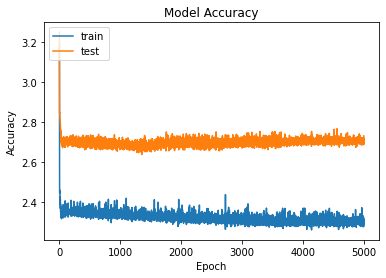

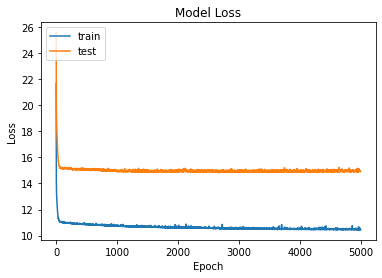

In [ ]:
# plot learning curves for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot learning curves for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()